
# Carbon-Free Commutes: Data Analysis & CO₂ Emission Prediction

This notebook explores commuting patterns, CO₂ emissions, and trains a model to predict emissions based on commute details.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("carbon_free_commutes[1].csv")

# Display first few rows
df.head()


,Commuter ID,City,Distance (km),Transportation Mode,CO₂ Emissions (kg),Time Taken (minutes)
0,1,Boston,22.96,Electric Car,1.1480,190.84
1,2,Seattle,21.40,Electric Car,1.0700,47.07
2,3,Chicago,11.79,Bike,0.0000,106.17
3,4,Seattle,3.29,Electric Car,0.1645,9.92
4,5,Seattle,9.90,Electric Car,0.4950,35.95


In [3]:

# Dataset information
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Commuter ID           100 non-null    int64  
 1   City                  100 non-null    object 
 2   Distance (km)         100 non-null    float64
 3   Transportation Mode   100 non-null    object 
 4   CO₂ Emissions (kg)    100 non-null    float64
 5   Time Taken (minutes)  100 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None
       Commuter ID  Distance (km)  CO₂ Emissions (kg)  Time Taken (minutes)
count   100.000000     100.000000          100.000000            100.000000
mean     50.500000      12.662700            0.268311             53.431700
std      29.011492       6.511814            0.366021             41.648853
min       1.000000       1.010000            0.000000              2.780000
25%      25.750000       7.135000         

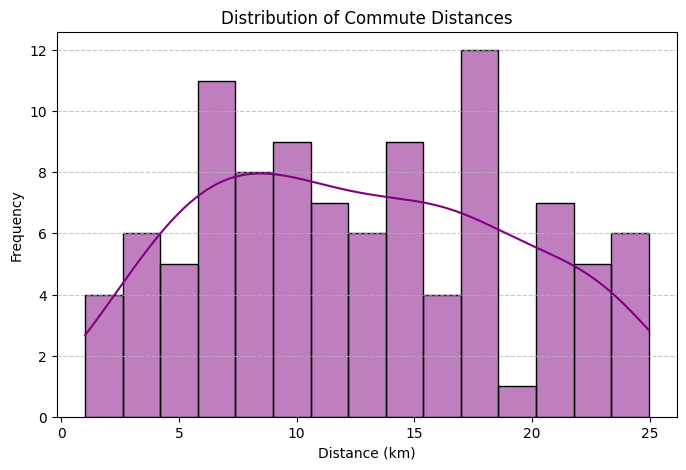

In [4]:

# Commute distance distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Distance (km)"], bins=15, kde=True, color='purple')
plt.title("Distribution of Commute Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:

# Encode categorical variables
df_model = df.copy()
le_city = LabelEncoder()
le_mode = LabelEncoder()

df_model["City"] = le_city.fit_transform(df_model["City"])
df_model["Transportation Mode"] = le_mode.fit_transform(df_model["Transportation Mode"])

# Define features and target
X = df_model.drop(columns=["Commuter ID", "CO₂ Emissions (kg)"])
y = df_model["CO₂ Emissions (kg)"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save model and scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [7]:

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0382
Mean Squared Error (MSE): 0.0037
R-squared (R²) Score: 0.9747


In [8]:

# Load saved model and scaler
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Test the loaded model with a sample input
sample_input = X_test.iloc[0].values.reshape(1, -1)
sample_input_scaled = loaded_scaler.transform(sample_input)
sample_prediction = loaded_model.predict(sample_input_scaled)

print("Sample input:", X_test.iloc[0].to_dict())
print("Predicted CO₂ Emissions:", sample_prediction[0])


Sample input: {'City': 4.0, 'Distance (km)': 10.57, 'Transportation Mode': 0.0, 'Time Taken (minutes)': 24.9}
Predicted CO₂ Emissions: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Download Model and Scaler

In [9]:

from google.colab import files  # Use this if running on Google Colab

# Download the trained model
files.download("model.pkl")

# Download the scaler
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>